<a href="https://colab.research.google.com/github/sejii93/class2022Spring/blob/main/Exponential_Smoothing_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, 
                 parse_dates=['date'], 
                 index_col='date')
                 
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


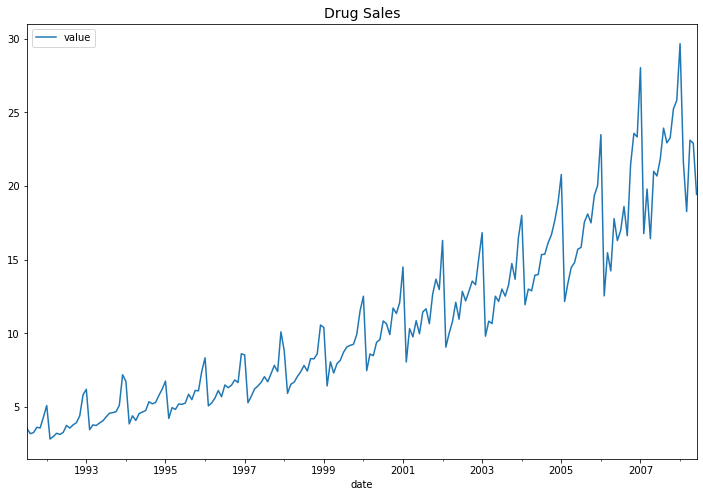

In [ ]:
## time series plot
df.plot(figsize=[12, 8])
plt.title('Drug Sales', fontsize=14)
plt.show()

In [ ]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train,
                          initialization_method="estimated").fit()

TypeError: ignored

In [ ]:
# Trend
fit2 = Holt(df_train, 
            initialization_method="estimated").fit()

TypeError: ignored

In [ ]:
# Exponential trend
fit3 = Holt(df_train,
            exponential=True, 
            initialization_method="estimated").fit()

TypeError: ignored